In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def dateCorrection(date):
    return date[:10]

In [16]:
def yearCorrection(date):
    return date[:4]

In [6]:
LSTData = pd.read_csv('modis_land_temp.csv')
LSTData

,system:index,date,temperature,.geo
0,2018_11_22,2018-11-22T00:00:00,306.777451,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,2018_11_23,2018-11-23T00:00:00,NaN,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2018_11_24,2018-11-24T00:00:00,306.703591,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,2018_11_25,2018-11-25T00:00:00,306.721724,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,2018_11_26,2018-11-26T00:00:00,305.730926,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...
1573,2023_03_27,2023-03-27T00:00:00,310.183775,"{""type"":""MultiPoint"",""coordinates"":[]}"
1574,2023_03_28,2023-03-28T00:00:00,310.153706,"{""type"":""MultiPoint"",""coordinates"":[]}"
1575,2023_03_29,2023-03-29T00:00:00,308.091161,"{""type"":""MultiPoint"",""coordinates"":[]}"
1576,2023_03_30,2023-03-30T00:00:00,313.634373,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [56]:
LSTCleaned = LSTData.drop(['.geo'], axis=1)
LSTCleaned = LSTCleaned.drop(['system:index'], axis=1)
LSTCleaned = LSTCleaned.dropna()

dates = LSTCleaned['date']
dates = dates.apply(dateCorrection)
LSTCleaned['date'] = dates

LSTCleaned = LSTCleaned.groupby(['date'], axis=0, as_index=False).mean()

years = LSTCleaned['date'].apply(yearCorrection)
LSTCleaned['year'] = years

LSTCleaned

,date,temperature,year
0,2018-11-22,306.777451,2018
1,2018-11-24,306.703591,2018
2,2018-11-25,306.721724,2018
3,2018-11-26,305.730926,2018
4,2018-11-27,307.240468,2018
...,...,...,...
1038,2023-03-26,305.494806,2023
1039,2023-03-27,310.183775,2023
1040,2023-03-28,310.153706,2023
1041,2023-03-29,308.091161,2023


In [94]:
COData = pd.read_csv('Sentinel_CO.csv')
NO2Data = pd.read_csv('Sentinel_NO2.csv')
SO2Data = pd.read_csv('Sentinel_SO2.csv')
AerosolData = pd.read_csv('Sentinel_Aerosol.csv')
CH4Data = pd.read_csv('Sentinel_CH4.csv')

COData

,system:index,CO_Density,date,.geo
0,20181122T083018_20181122T090735,0.038493,2018-11-22T08:30:12,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,20181122T083518_20181122T090825,NaN,2018-11-22T08:35:12,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,20181123T081018_20181123T084804,0.040350,2018-11-23T08:10:13,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,20181123T081518_20181123T084844,0.040227,2018-11-23T08:15:13,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,20181124T075518_20181124T083138,0.038790,2018-11-24T07:55:13,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...
2574,20230329T071922_20230329T075045,0.042151,2023-03-29T07:19:16,"{""type"":""MultiPoint"",""coordinates"":[]}"
2575,20230329T085922_20230329T093350,NaN,2023-03-29T08:59:16,"{""type"":""MultiPoint"",""coordinates"":[]}"
2576,20230330T083922_20230330T091116,0.042158,2023-03-30T08:39:16,"{""type"":""MultiPoint"",""coordinates"":[]}"
2577,20230331T081922_20230331T085450,0.040327,2023-03-31T08:19:17,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [9]:
COData.iloc[0]['system:index'][:8]

'20181122'

In [26]:
def cleanSentinelData(df):
    dates = df['date']
    dates = dates.apply(dateCorrection)

    cleanedDf = df
    cleanedDf['date'] = dates
    cleanedDf = cleanedDf.drop(['system:index'], axis=1)
    cleanedDf = cleanedDf.drop(['.geo'], axis=1)
    cleanedDf = cleanedDf.dropna()

    cleanedDf = cleanedDf.groupby(['date'], axis=0, as_index=False).mean()

    year = cleanedDf['date']
    year = year.apply(yearCorrection)

    cleanedDf['year'] = year
    
    return cleanedDf

In [27]:
CODataCleaned = cleanSentinelData(COData)
CODataCleaned

,date,CO_Density,year
0,2018-11-22,0.038493,2018
1,2018-11-23,0.040289,2018
2,2018-11-24,0.038790,2018
3,2018-11-25,0.038435,2018
4,2018-11-26,0.036405,2018
...,...,...,...
1412,2023-03-27,0.041800,2023
1413,2023-03-28,0.044621,2023
1414,2023-03-29,0.042151,2023
1415,2023-03-30,0.042158,2023


In [28]:
NO2DataCleaned = cleanSentinelData(NO2Data)
NO2DataCleaned

,date,NO2_Density,year
0,2018-11-22,0.000087,2018
1,2018-11-23,0.000099,2018
2,2018-11-24,0.000099,2018
3,2018-11-25,0.000102,2018
4,2018-11-26,0.000098,2018
...,...,...,...
1544,2023-03-27,0.000114,2023
1545,2023-03-28,0.000120,2023
1546,2023-03-29,0.000102,2023
1547,2023-03-30,0.000113,2023


In [29]:
SO2DataCleaned = cleanSentinelData(SO2Data)
SO2DataCleaned

,date,SO2_Density,year
0,2018-11-22,0.000206,2018
1,2018-11-23,0.000408,2018
2,2018-11-24,0.000125,2018
3,2018-11-25,0.000123,2018
4,2018-11-26,0.000763,2018
...,...,...,...
1271,2023-03-27,0.000148,2023
1272,2023-03-28,0.000232,2023
1273,2023-03-29,0.000309,2023
1274,2023-03-30,0.000217,2023


In [87]:
AerosolDataCleaned = cleanSentinelData(AerosolData)
AerosolDataCleaned

,date,Aerosol Index,year
0,2018-11-22,-0.830257,2018
1,2018-11-23,-1.153184,2018
2,2018-11-24,-1.380780,2018
3,2018-11-25,-0.895234,2018
4,2018-11-26,-0.357785,2018
...,...,...,...
1552,2023-03-27,-0.273565,2023
1553,2023-03-28,-0.752682,2023
1554,2023-03-29,-0.311399,2023
1555,2023-03-30,0.408122,2023


In [95]:
CH4DataCleaned = cleanSentinelData(CH4Data)
CH4DataCleaned

,date,year
0,2019-02-08,2019
1,2019-02-09,2019
2,2019-02-10,2019
3,2019-02-11,2019
4,2019-02-12,2019
...,...,...
1461,2023-03-27,2023
1462,2023-03-28,2023
1463,2023-03-29,2023
1464,2023-03-30,2023


In [30]:
JoinedCO = LSTCleaned.set_index('date').join(CODataCleaned.set_index('date')).dropna()
JoinedNO2 = LSTCleaned.set_index('date').join(NO2DataCleaned.set_index('date')).dropna()
JoinedSO2 = LSTCleaned.set_index('date').join(SO2DataCleaned.set_index('date')).dropna()

print(JoinedCO)
print(JoinedNO2)
print(JoinedSO2)

            temperature  CO_Density  year
date                                     
2018-11-22   306.777451    0.038493  2018
2018-11-24   306.703591    0.038790  2018
2018-11-25   306.721724    0.038435  2018
2018-11-26   305.730926    0.036405  2018
2018-11-27   307.240468    0.037373  2018
...                 ...         ...   ...
2023-03-26   305.494806    0.040546  2023
2023-03-27   310.183775    0.041800  2023
2023-03-28   310.153706    0.044621  2023
2023-03-29   308.091161    0.042151  2023
2023-03-30   313.634373    0.042158  2023

[1005 rows x 3 columns]
            temperature  NO2_Density  year
date                                      
2018-11-22   306.777451     0.000087  2018
2018-11-24   306.703591     0.000099  2018
2018-11-25   306.721724     0.000102  2018
2018-11-26   305.730926     0.000098  2018
2018-11-27   307.240468     0.000091  2018
...                 ...          ...   ...
2023-03-26   305.494806     0.000100  2023
2023-03-27   310.183775     0.000114  2023

In [31]:
CODataCleaned

,date,CO_Density,year
0,2018-11-22,0.038493,2018
1,2018-11-23,0.040289,2018
2,2018-11-24,0.038790,2018
3,2018-11-25,0.038435,2018
4,2018-11-26,0.036405,2018
...,...,...,...
1412,2023-03-27,0.041800,2023
1413,2023-03-28,0.044621,2023
1414,2023-03-29,0.042151,2023
1415,2023-03-30,0.042158,2023


In [46]:
CO18 = CODataCleaned[CODataCleaned['year']=='2018'].drop(columns='year')
CO19 = CODataCleaned[CODataCleaned['year']=='2019'].drop(columns='year')
CO20 = CODataCleaned[CODataCleaned['year']=='2020'].drop(columns='year')
CO21 = CODataCleaned[CODataCleaned['year']=='2021'].drop(columns='year')
CO22 = CODataCleaned[CODataCleaned['year']=='2022'].drop(columns='year')

In [59]:
NO2_18 = NO2DataCleaned[NO2DataCleaned['year']=='2018'].drop(columns='year')
NO2_19 = NO2DataCleaned[NO2DataCleaned['year']=='2019'].drop(columns='year')
NO2_20 = NO2DataCleaned[NO2DataCleaned['year']=='2020'].drop(columns='year')
NO2_21 = NO2DataCleaned[NO2DataCleaned['year']=='2021'].drop(columns='year')
NO2_22 = NO2DataCleaned[NO2DataCleaned['year']=='2022'].drop(columns='year')

In [60]:
SO2_18 = SO2DataCleaned[SO2DataCleaned['year']=='2018'].drop(columns='year')
SO2_19 = SO2DataCleaned[SO2DataCleaned['year']=='2019'].drop(columns='year')
SO2_20 = SO2DataCleaned[SO2DataCleaned['year']=='2020'].drop(columns='year')
SO2_21 = SO2DataCleaned[SO2DataCleaned['year']=='2021'].drop(columns='year')
SO2_22 = SO2DataCleaned[SO2DataCleaned['year']=='2022'].drop(columns='year')

In [88]:
Aerosol_18 = AerosolDataCleaned[AerosolDataCleaned['year']=='2018'].drop(columns='year')
Aerosol_19 = AerosolDataCleaned[AerosolDataCleaned['year']=='2019'].drop(columns='year')
Aerosol_20 = AerosolDataCleaned[AerosolDataCleaned['year']=='2020'].drop(columns='year')
Aerosol_21 = AerosolDataCleaned[AerosolDataCleaned['year']=='2021'].drop(columns='year')
Aerosol_22 = AerosolDataCleaned[AerosolDataCleaned['year']=='2022'].drop(columns='year')

In [61]:
LST18 = LSTCleaned[LSTCleaned['year']=='2018'].drop(columns='year')
LST19 = LSTCleaned[LSTCleaned['year']=='2019'].drop(columns='year')
LST20 = LSTCleaned[LSTCleaned['year']=='2020'].drop(columns='year')
LST21 = LSTCleaned[LSTCleaned['year']=='2021'].drop(columns='year')
LST22 = LSTCleaned[LSTCleaned['year']=='2022'].drop(columns='year')

<Axes: ylabel='temperature'>

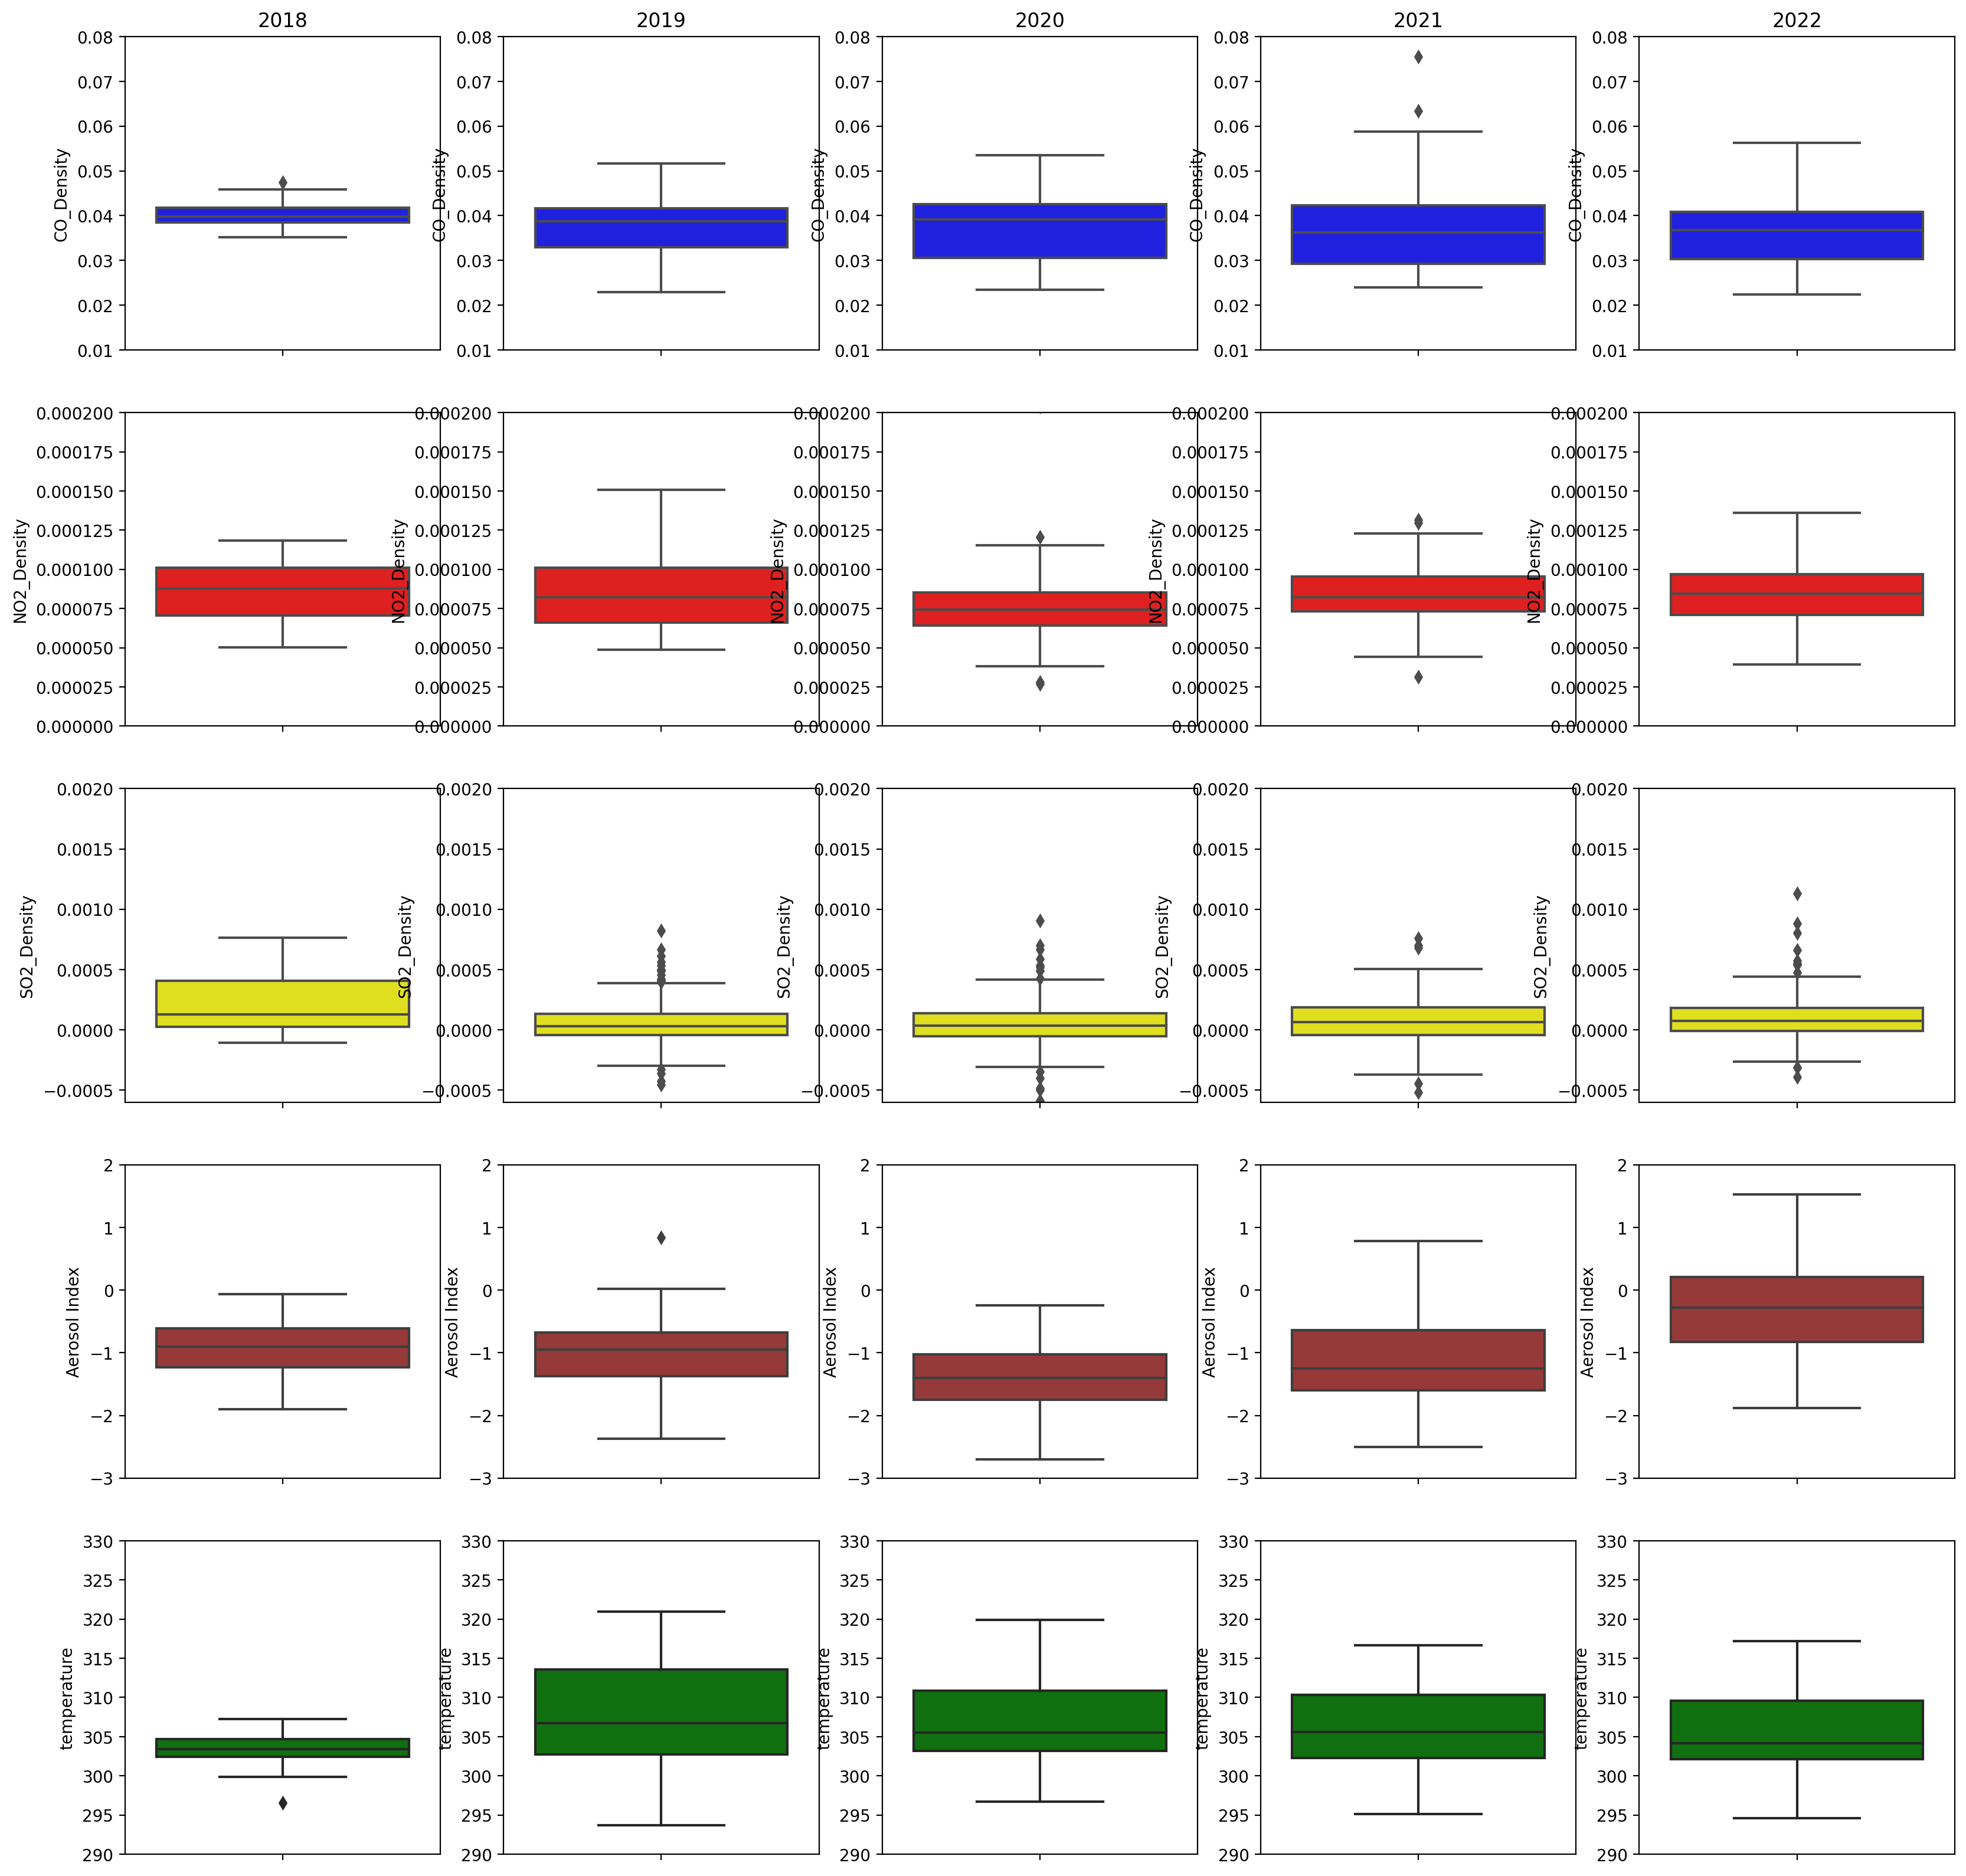

In [93]:
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(20,20), dpi=200)
axs[0][0].set_title("2018")
axs[0][1].set_title("2019")
axs[0][2].set_title("2020")
axs[0][3].set_title("2021")
axs[0][4].set_title("2022")

for i in range(axs[0].size):
    axs[0][i].set_ylim(0.01, 0.08)
sns.boxplot(y=CO18['CO_Density'], ax=axs[0][0], color='blue')
sns.boxplot(y=CO19['CO_Density'], ax=axs[0][1], color='blue')
sns.boxplot(y=CO20['CO_Density'], ax=axs[0][2], color='blue')
sns.boxplot(y=CO21['CO_Density'], ax=axs[0][3], color='blue')
sns.boxplot(y=CO22['CO_Density'], ax=axs[0][4], color='blue')

for i in range(axs[1].size):
    axs[1][i].set_ylim(0, 0.0002)
sns.boxplot(y=NO2_18['NO2_Density'], ax=axs[1][0], color='red')
sns.boxplot(y=NO2_19['NO2_Density'], ax=axs[1][1], color='red')
sns.boxplot(y=NO2_20['NO2_Density'], ax=axs[1][2], color='red')
sns.boxplot(y=NO2_21['NO2_Density'], ax=axs[1][3], color='red')
sns.boxplot(y=NO2_22['NO2_Density'], ax=axs[1][4], color='red')

for i in range(axs[0].size):
    axs[2][i].set_ylim(-0.0006, 0.002)
sns.boxplot(y=SO2_18['SO2_Density'], ax=axs[2][0], color='yellow')
sns.boxplot(y=SO2_19['SO2_Density'], ax=axs[2][1], color='yellow')
sns.boxplot(y=SO2_20['SO2_Density'], ax=axs[2][2], color='yellow')
sns.boxplot(y=SO2_21['SO2_Density'], ax=axs[2][3], color='yellow')
sns.boxplot(y=SO2_22['SO2_Density'], ax=axs[2][4], color='yellow')

for i in range(axs[0].size):
    axs[3][i].set_ylim(-3, 2)
sns.boxplot(y=Aerosol_18['Aerosol Index'], ax=axs[3][0], color='brown')
sns.boxplot(y=Aerosol_19['Aerosol Index'], ax=axs[3][1], color='brown')
sns.boxplot(y=Aerosol_20['Aerosol Index'], ax=axs[3][2], color='brown')
sns.boxplot(y=Aerosol_21['Aerosol Index'], ax=axs[3][3], color='brown')
sns.boxplot(y=Aerosol_22['Aerosol Index'], ax=axs[3][4], color='brown')


for i in range(axs[0].size):
    axs[4][i].set_ylim(290, 330)
sns.boxplot(y=LST18['temperature'], ax=axs[4][0], color='green')
sns.boxplot(y=LST19['temperature'], ax=axs[4][1], color='green')
sns.boxplot(y=LST20['temperature'], ax=axs[4][2], color='green')
sns.boxplot(y=LST21['temperature'], ax=axs[4][3], color='green')
sns.boxplot(y=LST22['temperature'], ax=axs[4][4], color='green')